# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving google-play-store.csv to google-play-store.csv


In [11]:
import io
playstore_data = pd.read_csv(io.BytesIO(uploaded['google-play-store.csv']))

In [12]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**CLEANING DATA**

In [20]:
playstore_data.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [22]:
playstore_data[playstore_data.Installs == "0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
# Remove a row that have Installs = 0
playstore_data = playstore_data[playstore_data.Installs != "0"]

In [25]:
# Removing Duplicate Values
playstore_data = playstore_data.drop_duplicates(['App'], keep='first')

**Handling Data**

In [26]:
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
# removing the commas and + from installs
playstore_data.Installs = playstore_data.Installs.str.replace(",", "")
playstore_data.Installs = playstore_data.Installs.str.replace("+", "")

In [31]:
# remove $ from Price
playstore_data.Price = playstore_data.Price.str.replace("$", "")

In [33]:
# clean 'M','k', fill 'Varies with device' with median and convert to float
sizek = []
for i in playstore_data.Size:
  if 'M' in i:
    i = float(i.replace("M", ""))*1000
    sizek.append(i)
  elif 'k' in i:
    i = float(i.replace("k",""))
    sizek.append(i)
  else:
    sizek.append("unk")
k = pd.Series(sizek)
median = k[k!="unk"].median()
k = [median if i == "unk" else i for i in k]
playstore_data.Size = k

**Data analysis**

Top 15 Categories in Playstore

In [36]:
#top 15 Categories in Playstore
playstore_data.Category.value_counts().nlargest(15)

FAMILY                1831
GAME                   959
TOOLS                  827
BUSINESS               420
MEDICAL                395
PERSONALIZATION        376
PRODUCTIVITY           374
LIFESTYLE              369
FINANCE                345
SPORTS                 325
COMMUNICATION          315
HEALTH_AND_FITNESS     288
PHOTOGRAPHY            281
NEWS_AND_MAGAZINES     254
SOCIAL                 239
Name: Category, dtype: int64

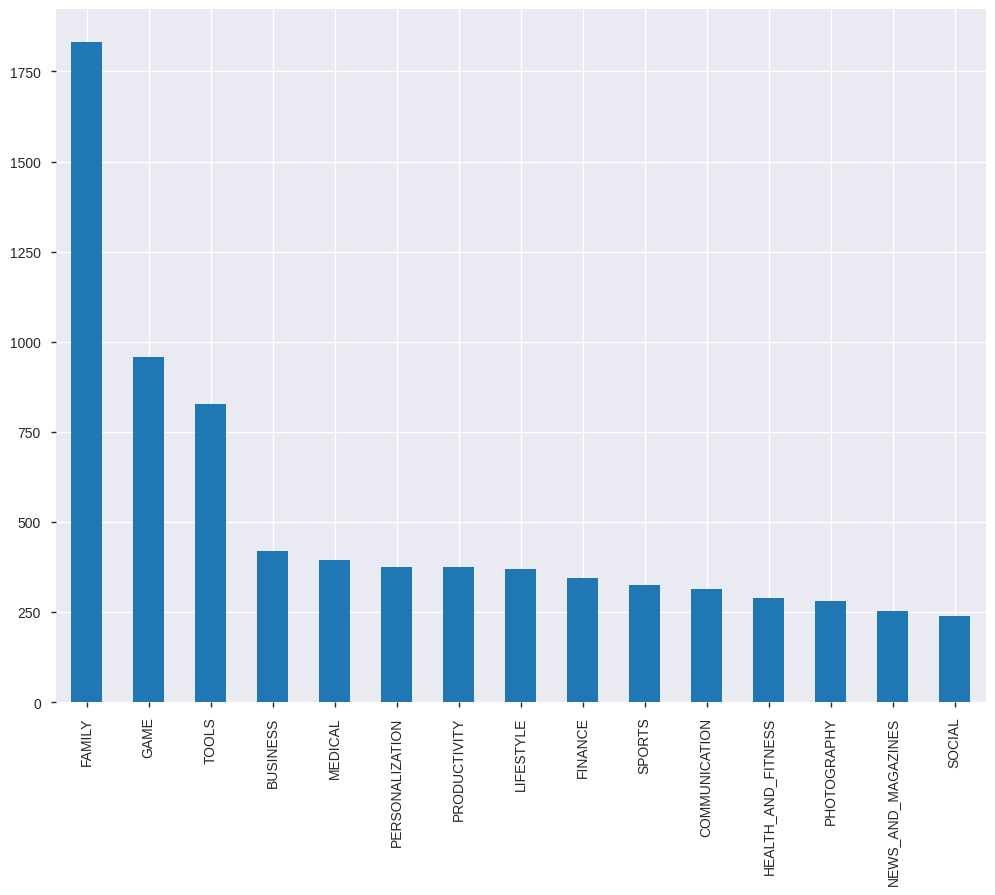

In [37]:
playstore_data.Category.value_counts().nlargest(15).plot(kind='bar',figsize= (12,9))

Free and Paid Apps

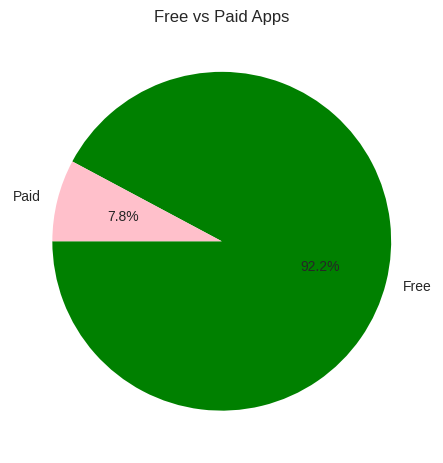

In [45]:
size=[8895,753]
sentiment = ['Free', 'Paid']
colors = ['g', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=180, autopct='%.1f%%')
plt.title('Free vs Paid Apps')
plt.show()

Top 10 Games

In [47]:
playstore_data[(playstore_data.Category == "GAME") & (playstore_data.Type == "Free")].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67000.0,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74000.0,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23000.0,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46000.0,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1658,Hello Kitty Nail Salon,GAME,4.2,369203,24000.0,50000000,Free,0,Everyone,Casual;Pretend Play,"April 17, 2018",1.5,4.1 and up
1659,slither.io,GAME,4.4,5234162,12000.0,100000000,Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62000.0,500000000,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24000.0,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


App Rating

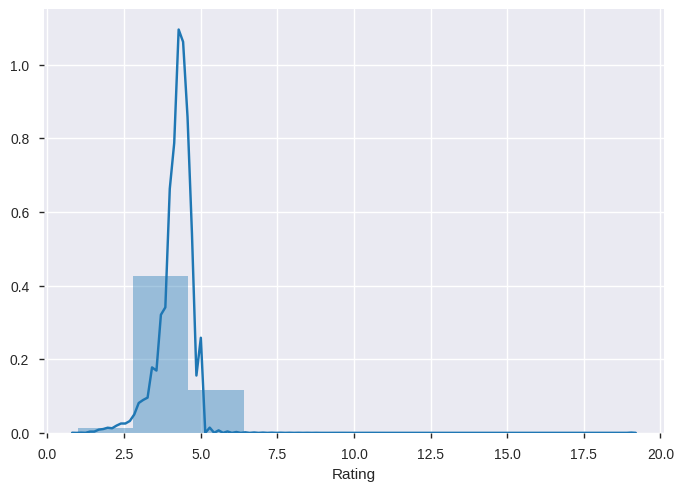

In [50]:
sns.distplot(playstore_data.Rating, bins = 10)